# Определение перспективного тарифа для телеком компании

## Описание проекта

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Цель проекта** - определить самый доходный тариф.

**Задачи проекта**:

- провести предварительный анализ тарифов на небольшой выборке клиентов 

- проанализировать поведение клиентов

**Исходные данный**:

- данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

### Описание тарифов

**Тариф «Смарт»**

- Ежемесячная плата: 550 рублей

- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

- Стоимость услуг сверх тарифного пакета:

минута разговора: 3 рубля

сообщение: 3 рубля

1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

- Ежемесячная плата: 1950 рублей

- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

- Стоимость услуг сверх тарифного пакета:

минута разговора: 1 рубль

сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей

Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

# Структура проекта:

# Шаг 1. Изучение общей информации

- открыть файлы и изучить информацию в них

**Пути к файлам:**

/datasets/calls.csv.

/datasets/internet.csv.

/datasets/messages.csv. 

/datasets/tariffs.csv. 

/datasets/users.csv. 

# Шаг 2. Подготовка данных

- Приведем данные к нужным типам;

- Найдем и исправим ошибки в данных.

- Поясним, какие ошибки мы нашли и как их исправили. 

- Посчитайте для каждого пользователя:

количество сделанных звонков и израсходованных минут разговора по месяцам;

количество отправленных сообщений по месяцам;

объем израсходованного интернет-трафика по месяцам;

помесячную выручку с каждого пользователя.

# Шаг 3. Проанализируем данные

- Опишем поведение клиентов оператора, исходя из выборки. 

- Определим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

- Посчитатаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы. Опишем распределения.

# Шаг 4. Проверим гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

- Пороговое значение alpha зададим самостоятельно.

Поясним:

- как мы формулировали нулевую и альтернативную гипотезы;

- какой критерий использовали для проверки гипотез и почему.

# Шаг 5. Результаты исследования

- общие выводы

- рекомендации

# Описание данных

**Таблица users (информация о пользователях):**

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана

**Таблица calls (информация о звонках):**

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Примечание. Если объединение таблиц методом merge приводит к ошибке dead kernell, примените метод join — это облегчит нагрузку на Jupyter Notebook.**


# Шаг 1. Изучение общей информации

Импортируем необходимые библиотеки и посмотрим на данные:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pymystem3 import Mystem
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv') 
internet = pd.read_csv('/datasets/internet.csv') 
messages = pd.read_csv('/datasets/messages.csv') 
tariffs = pd.read_csv('/datasets/tariffs.csv') 
users = pd.read_csv('/datasets/users.csv') 


## Рассмотрим таблицу со звонками клиентов

In [3]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [4]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
calls.tail(10)

,id,call_date,duration,user_id
202597,1499_210,2018-10-02,8.86,1499
202598,1499_211,2018-12-29,4.58,1499
202599,1499_212,2018-12-30,1.35,1499
202600,1499_213,2018-10-17,10.77,1499
202601,1499_214,2018-12-05,2.42,1499
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [6]:
calls.sample(10)

,id,call_date,duration,user_id
78423,1196_655,2018-12-12,8.52,1196
68527,1173_260,2018-09-22,12.75,1173
81641,1203_214,2018-12-09,14.95,1203
155032,1382_815,2018-11-06,7.14,1382
78534,1196_766,2018-11-01,1.59,1196
159917,1394_322,2018-10-16,0.00,1394
182222,1453_1414,2018-11-17,26.26,1453
91219,1227_639,2018-05-23,13.93,1227
31698,1079_69,2018-11-26,1.35,1079
112557,1289_415,2018-12-06,5.86,1289


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
calls.duplicated().sum()

0

## Рассмотрим таблицу с интернетом

In [9]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [10]:
internet.head(10)


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [11]:
internet.tail(10)

,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [12]:
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
45038,45038,1155_225,467.57,2018-02-12,1155
17625,17625,1061_14,176.28,2018-07-28,1061
49995,49995,1172_277,1086.06,2018-12-14,1172
70085,70085,1239_106,651.40,2018-09-11,1239
137864,137864,1464_88,383.25,2018-11-20,1464
19637,19637,1066_118,0.00,2018-10-23,1066
144765,144765,1483_144,0.00,2018-09-01,1483
84082,84082,1284_436,257.09,2018-09-20,1284
94657,94657,1320_75,980.79,2018-12-13,1320
54426,54426,1182_123,439.17,2018-11-02,1182


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [14]:
internet.duplicated().sum()

0

## Рассмотрим таблицу с отправленными сообщениями

In [15]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [16]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [17]:
messages.tail(10)

,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [18]:
messages.sample(10)

,id,message_date,user_id
33306,1146_104,2018-05-30,1146
120927,1490_149,2018-11-18,1490
59875,1262_366,2018-05-15,1262
109878,1441_43,2018-11-18,1441
114114,1465_6,2018-07-10,1465
4362,1016_42,2018-12-27,1016
24837,1104_29,2018-08-09,1104
28567,1124_30,2018-10-08,1124
39243,1168_21,2018-06-05,1168
34006,1147_148,2018-10-29,1147


In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [20]:
messages.duplicated().sum()

0

## Рассмотрим таблицу с трафиком

In [21]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [22]:
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [24]:
tariffs.duplicated().sum()

0

# Рассмотрим таблицу с пользователями

In [25]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [26]:
users.head(20)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [27]:
users.tail(20)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
480,1480,29,2018-09-26,Новокузнецк,Гелена,Емельянова,2018-02-14,smart
481,1481,70,NaN,Москва,Клавдия,Чижова,2018-02-26,smart
482,1482,68,NaN,Санкт-Петербург,Алина,Блохина,2018-02-28,smart
483,1483,28,NaN,Ульяновск,Серафима,Борисова,2018-04-11,smart
484,1484,55,NaN,Екатеринбург,Илзе,Абалдуева,2018-08-04,smart
485,1485,34,NaN,Киров,Таисия,Сухова,2018-12-29,ultra
486,1486,35,NaN,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart
487,1487,72,NaN,Кострома,Рудольф,Кириллов,2018-08-13,smart
488,1488,47,NaN,Новороссийск,Вадим,Филатов,2018-11-07,smart
489,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [28]:
users.sample(20)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
458,1458,36,NaN,Барнаул,Роберт,Азаров,2018-02-13,ultra
203,1203,39,NaN,Москва,Владимир,Григорьев,2018-03-13,ultra
302,1302,43,NaN,Уфа,Владислав,Абаимов,2018-01-23,smart
334,1334,45,NaN,Владивосток,Пётр,Минаев,2018-11-16,smart
393,1393,56,NaN,Краснодар,Артём,Зубков,2018-02-17,smart
473,1473,18,NaN,Красноярск,Николай,Лебедев,2018-08-05,ultra
194,1194,70,NaN,Москва,Егор,Наумов,2018-12-03,smart
455,1455,38,NaN,Балашиха,Рубен,Авринский,2018-03-22,ultra
245,1245,32,NaN,Москва,Маргарита,Коновалова,2018-09-10,ultra
231,1231,63,NaN,Чебоксары,Касьян,Авдюков,2018-05-23,ultra


In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [30]:
users.duplicated().sum()

0

**Выводы:**
- данные представляют собой набор таблиц, который нужно сначала обработать, а потом объединить, потому что работать с пятью таблицами очень неудобно;

- пропуски присутствую только в одной из таблиц - в таблице users, в столбце churn_date (причем пропуски преобладают - заполнено лишь 38 значений из 500).Это может стать зацепкой для дальнейших исследований (почему пользователи не заполняют данную графу или система не сохраняет их ответы?);

- дубликаты не обнаружены;

- во многих таблицах типы данных требуют изменения на целочисленный тип.


# Шаг 2. Подготовка данных

- Приведем данные к нужным типам;

- Найдем и исправим ошибки в данных.

- Поясним, какие ошибки мы нашли и как их исправили. 

- Посчитайте для каждого пользователя:

количество сделанных звонков и израсходованных минут разговора по месяцам;

количество отправленных сообщений по месяцам;

объем израсходованного интернет-трафика по месяцам;

помесячную выручку с каждого пользователя.

С помощью метода .isna() определим, в каких столбцах встречаются пропущенные значения

In [31]:
calls.isna().sum().sort_values()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [32]:
internet.isna().sum().sort_values()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [33]:
messages.isna().sum().sort_values()

id              0
message_date    0
user_id         0
dtype: int64

In [34]:
tariffs.isna().sum().sort_values()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [35]:
users.isna().sum().sort_values()

user_id         0
age             0
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
churn_date    462
dtype: int64

Пропуски есть только в столбце churn_date — дате прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Пока не будем их заменять, возможно, эти данные нам еще пригодятся.

## Теперь разберемся с типами данных:

### Таблица со звонками

In [36]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [37]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [38]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [39]:
# Округлим значения, как и говорилось в задаче
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [40]:
# В столбце присутствуют нулевые звонки, но так как оператор предпочитает округлять звонки до минуты минутой, заменим 0 на 1.
calls['duration'] = calls['duration'].replace(0, 1)

In [41]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


### Таблица с интернетом

In [42]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [43]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [44]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [45]:
internet['mb_used'] = internet['mb_used'].astype('int')

Сразу удалим столбец Unnamed, потому что он не несет никакой смысловой нагрузки:

In [46]:
internet.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [47]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


In [48]:
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112,2018-11-25,1000
1,1000_1,1052,2018-09-07,1000
2,1000_2,1197,2018-06-25,1000
3,1000_3,550,2018-08-22,1000
4,1000_4,302,2018-09-24,1000
5,1000_5,399,2018-10-02,1000
6,1000_6,540,2018-09-07,1000
7,1000_7,415,2018-07-11,1000
8,1000_8,505,2018-10-08,1000
9,1000_9,345,2018-09-03,1000


### Таблица с отправленными сообщениями

In [49]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [50]:
messages.head(20)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [51]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [52]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Таблица с трафиком

In [53]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [54]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [55]:
#Тут с типами данных все в порядке, не меняем.
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [56]:
# Таблица users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [57]:
users.head(20)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [58]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [59]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")

In [60]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [61]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


Посмотрим, есть ли ошибки в данных:

1. В таблице messages есть столбец с одинаковыми значениями - user_id — идентификатор пользователя, отправившего сообщение. Логично, что идентификатор у каждого пользователя свой, поэтому этот столбец неинформативен. Удалять пока не будем, возможно, он понадобится для объединения таблиц.
2. Аналогичный столбец присутствует в таблицах calls  и internet.

Пришло время объединять таблицы:

- для начала добавим в каждую таблицу столбец с месяцем. Месяц можно извлечь из данных с типом datetime

- составим сводную таблицу

- объединим сводные таблицы

In [62]:
calls['month'] = calls['call_date'].dt.month_name()
internet['month'] = internet['session_date'].dt.month_name()
messages['month'] = messages['message_date'].dt.month_name()
users['month'] = users['reg_date'].dt.month_name()

In [63]:
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,July
1,1000_1,2018-08-17,1,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December
5,1000_5,2018-11-02,1,1000,November
6,1000_6,2018-10-18,1,1000,October
7,1000_7,2018-08-22,19,1000,August
8,1000_8,2018-09-15,19,1000,September
9,1000_9,2018-08-15,1,1000,August


# количество сделанных звонков и израсходованных минут разговора по месяцам

In [64]:
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})\

In [65]:
user_calls.head()

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,August,418,52
1,1000,December,341,46
2,1000,July,346,47
3,1000,June,187,43
4,1000,May,164,22


# количество отправленных сообщений по месяцам

In [66]:
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_in_month'})

In [67]:
user_messages.head()

,user_id,month,sms_total_in_month
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


# объем израсходованного интернет-трафика по месяцам

In [68]:
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total_in_month'})

In [69]:
user_internet.head()

,user_id,month,mb_total_in_month
0,1000,August,14043
1,1000,December,9808
2,1000,July,13988
3,1000,June,23213
4,1000,May,2252


# помесячную выручку с каждого пользователя

Соединим получившиеся сводные таблицы и посчитаем помесячную выручку с каждого пользователя.

In [70]:
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')

In [71]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month
0,1000,August,418.0,52.0,81.0
1,1000,December,341.0,46.0,70.0
2,1000,July,346.0,47.0,75.0
3,1000,June,187.0,43.0,60.0
4,1000,May,164.0,22.0,22.0


In [72]:
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')

In [73]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
0,1000,August,418.0,52.0,81.0,14043.0
1,1000,December,341.0,46.0,70.0,9808.0
2,1000,July,346.0,47.0,75.0,13988.0
3,1000,June,187.0,43.0,60.0,23213.0
4,1000,May,164.0,22.0,22.0,2252.0


In [74]:
df = df.merge(users, on='user_id', how='left')

In [75]:
df.head()

,user_id,month_x,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,month_y
0,1000,August,418.0,52.0,81.0,14043.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May
1,1000,December,341.0,46.0,70.0,9808.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May
2,1000,July,346.0,47.0,75.0,13988.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May
3,1000,June,187.0,43.0,60.0,23213.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May
4,1000,May,164.0,22.0,22.0,2252.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May


In [76]:
df = df.merge(tariffs, on='tariff', how='left')

In [77]:
df.isna().sum()

user_id                     0
month_x                     0
month_calls_duration       40
calls_total_in_month       40
sms_total_in_month        497
mb_total_in_month          11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
month_y                     0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Заполним пропуски в столбцах month_calls_duration, calls_total_in_month, sms_total_in_month,    mb_total_in_month нулями.

In [78]:
df['sms_total_in_month'] = df['sms_total_in_month'].fillna(0)
df['mb_total_in_month'] = df['mb_total_in_month'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)

In [79]:
df.isna().sum()

user_id                     0
month_x                     0
month_calls_duration        0
calls_total_in_month        0
sms_total_in_month          0
mb_total_in_month           0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
month_y                     0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

churn_date пока не трогаем, это важные пропуски.

In [80]:
df.duplicated().sum()

0

Построим функцию, которая будет считать помесячную выручку с каждого пользователя:

- вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика

- остаток умножим на значение из тарифного плана

- прибавим абонентскую плату, соответствующую тарифному плану

In [81]:
def above_the_tariff(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil((row['mb_total_in_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [82]:
df.sample(10)

,user_id,month_x,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,...,reg_date,tariff,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
2578,1407,August,154.0,24.0,11.0,10868.0,40,NaT,Челябинск,Элла,...,2018-08-14,smart,August,50,15360,500,550,200,3,3
1711,1274,October,742.0,83.0,84.0,16059.0,53,NaT,Волгоград,Аксён,...,2018-05-03,smart,May,50,15360,500,550,200,3,3
2524,1396,October,501.0,67.0,63.0,7946.0,23,NaT,Пенза,Эльга,...,2018-01-12,ultra,January,1000,30720,3000,1950,150,1,1
1287,1203,September,457.0,66.0,26.0,10536.0,39,NaT,Москва,Владимир,...,2018-03-13,ultra,March,1000,30720,3000,1950,150,1,1
2027,1324,July,738.0,97.0,137.0,20058.0,25,NaT,Череповец,Дайна,...,2018-05-28,smart,May,50,15360,500,550,200,3,3
53,1007,April,202.0,25.0,11.0,8013.0,65,NaT,Москва,Юна,...,2018-04-19,smart,April,50,15360,500,550,200,3,3
2232,1358,June,677.0,83.0,55.0,10793.0,64,NaT,Ставрополь,Демьян,...,2018-02-21,smart,February,50,15360,500,550,200,3,3
1991,1318,March,256.0,39.0,14.0,4047.0,53,NaT,Курган,Марьяна,...,2018-03-22,ultra,March,1000,30720,3000,1950,150,1,1
1771,1284,April,480.0,69.0,39.0,15266.0,62,NaT,Волгоград,Евфросинья,...,2018-03-16,smart,March,50,15360,500,550,200,3,3
2269,1363,May,636.0,108.0,0.0,14393.0,69,NaT,Нижний Тагил,Оксана,...,2018-03-04,ultra,March,1000,30720,3000,1950,150,1,1


In [83]:
df['above_the_tariff'] = df.apply(above_the_tariff, axis=1)

In [84]:
df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']

In [85]:
df.sort_values(by='total_paid').sample(5)

,user_id,month_x,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,...,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
2384,1379,October,992.0,130.0,129.0,25719.0,39,NaT,Москва,Нелли,...,August,1000,30720,3000,1950,150,1,1,0.0,1950.0
2234,1358,May,629.0,87.0,60.0,11406.0,64,NaT,Ставрополь,Демьян,...,February,50,15360,500,550,200,3,3,417.0,967.0
1385,1219,May,475.0,57.0,13.0,17197.0,75,NaT,Киров,Кузьма,...,January,50,15360,500,550,200,3,3,359.0,909.0
988,1158,April,424.0,62.0,60.0,11297.0,45,NaT,Новокузнецк,Игорь,...,February,50,15360,500,550,200,3,3,30.0,580.0
2261,1362,October,520.0,69.0,11.0,10581.0,47,NaT,Владимир,Нина,...,August,50,15360,500,550,200,3,3,60.0,610.0


**Вывод:**

Данные были обработаны: мы избаились от пропусков, перевели данные в целочисленный тип для того, чтобы было удобно с ними работать, объединили таблицы по сводным таблицам. 

На втором этапе работы были посчитаны:

1. количество сделанных звонков и израсходованных минут разговора по месяцам;

2. количество отправленных сообщений по месяцам;

3. объем израсходованного интернет-трафика по месяцам;

4. помесячная выручка с каждого пользователя 

Теперь, когда у нас есть достаточно данных, и проведен первичый анализ клиентов и их потребностей, можно приступать к полноценному анализу и строить гипотезы по выбору наилучшего тарифа.



# Шаг 3. Проанализируем данные

На данном этапе мы:

- Опишем поведение клиентов оператора, исходя из выборки.

- Определим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

- Посчитатаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы. Опишем распределения.

In [86]:
df.describe()

,user_id,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.00000,3214.000000
mean,1251.590230,463.570006,63.038892,38.281269,17187.615744,46.641568,341.148102,20067.405103,1266.179216,979.060361,184.676416,2.387057,2.387057,515.35781,1494.418171
std,144.659172,247.918544,33.236368,36.148326,7563.670810,16.586109,438.044726,7082.491569,1152.749279,645.539596,23.054986,0.922199,0.922199,739.97440,784.672255
min,1000.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.00000,550.000000
25%,1125.000000,291.000000,40.000000,9.000000,12471.750000,32.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.00000,709.250000
50%,1253.000000,456.000000,62.000000,30.000000,16920.500000,46.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,120.50000,1580.000000
75%,1378.750000,605.000000,82.000000,57.000000,21400.500000,62.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,849.75000,1950.000000
max,1499.000000,1727.000000,244.000000,224.000000,49701.000000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,6196.00000,6746.000000


Посмотрим, как взаимодействуют клиенты со своими тарифами (хватает ли им тех параметров, которое предоставляет им тариф).

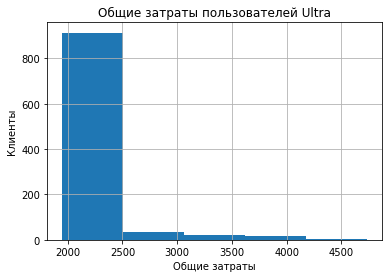

In [87]:
df[df['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=5, grid=True)
plt.xlabel('Общие затраты')
plt.ylabel('Клиенты')
plt.title('Общие затраты пользователей Ultra')
plt.show();

Из гистограммы мы видим, что общие затраты клиентов от примерно 1900 до 2300 руб, лишь немногие клиенты выходят за эти границы.

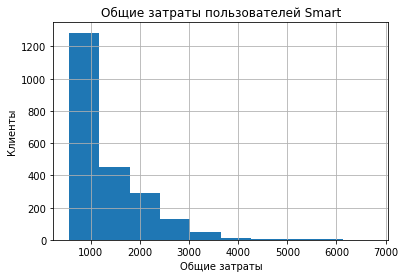

In [88]:
df[df['tariff'] == 'smart']['total_paid'].plot(kind='hist', bins=10, grid=True)
plt.xlabel('Общие затраты')
plt.ylabel('Клиенты')
plt.title('Общие затраты пользователей Smart')
plt.show();

Из гистограммы мы видим, что пользователи по-разному пользуются услугами оператора, но более 1200 клиентов с среднем затрачивают около 500 - 1200 р., в то время как слудующая группа в 500 человек затрачивает 1200-1800 р., группа в 300 человек тратит 1800 - 2400 р., и оставшиеся тратят больше 2400, вплоть до чуть более 6000 р.

Всвязи с открывшейся информацией о затратах клиентов, стоит посмотреть на среднее и медиану, стандартное отклонение и дисперсию по общим затратам клиентов:

In [89]:
df.groupby('tariff').agg({'total_paid':['median','mean','var','std']})\
  

total_paid                                        
           median         mean            var         std
tariff                                                   
smart       980.0  1244.804845  629296.045829  793.281820
ultra      1950.0  2059.279188  125043.260390  353.614565

Чего и стоило ожидать, стандартное отклонение и дисперсия тарифа Smart гораздо выше, чем аналогичные показатели тарифа Ultra. Это может говорить о несбалансированности тарифа.

Далее постоим графики по месяцам для кажого тарифа по каждому из параметров (минуты, sms, объем трафика, который требуется клиентам):

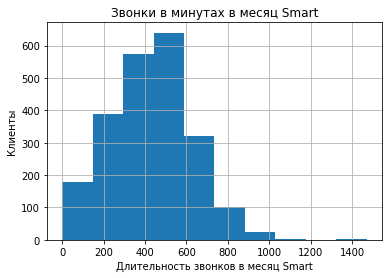

In [90]:
df[df['tariff'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=10, grid=True)
plt.title('Звонки в минутах в месяц Smart')
plt.xlabel('Длительность звонков в месяц Smart')
plt.ylabel('Клиенты')
plt.show();

Сразу видно нормальное распределение с вершиной в 600 и отклонениями в обе стороны.

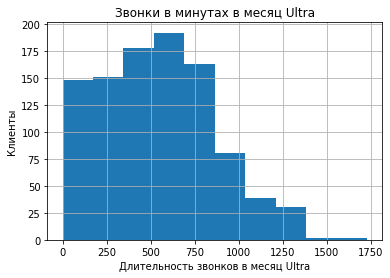

In [91]:
df[df['tariff'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=10, grid=True)
plt.title('Звонки в минутах в месяц Ultra')
plt.xlabel('Длительность звонков в месяц Ultra')
plt.ylabel('Клиенты')
plt.show();

Сначала распределение напоминает распределение непрерывное, после достижения вершины в примерно 190. распределение становится нормальным.Тут мы можем выделить то, что большая часть пользователей звонить от 0 до 800 минут в месяц, после этого значения идет заметное снижние активности.

На Smart  клиенты в месяц говорят около 450 минут, на Ultra -  550 минут в месяц. 

Теперь аналогичным образом рассмотрим количество потраченных Мб.

In [92]:
df.groupby('tariff').agg({'mb_total_in_month':['median','mean','var','std']})\
 

mb_total_in_month                                          
                  median          mean           var           std
tariff                                                            
smart            16482.0  16187.578735  3.437981e+07   5863.430302
ultra            19289.0  19450.643655  1.015661e+08  10077.999744

Здесь ситуация противоположная - на Ультре стандартное отклонение и дисперсия выше, чем на Смарте. Медианы и средние примерно равны, значит, выбросов видимых нет.

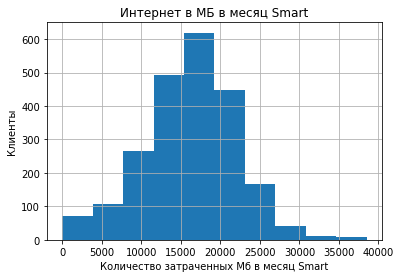

In [93]:
df[df['tariff'] == 'smart']['mb_total_in_month'].plot(kind='hist', bins=10, grid=True)
plt.title('Интернет в МБ в месяц Smart')
plt.xlabel('Количество затраченных Мб в месяц Smart')
plt.ylabel('Клиенты')
plt.show();

На данном графике видим нормальное распределение с пиком в примерно 600 клиентов и 1700 Мб.

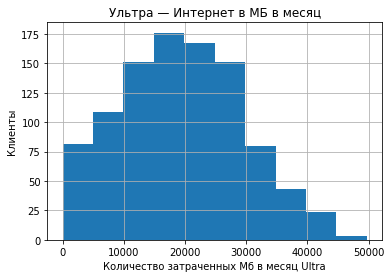

In [94]:
df[df['tariff'] == 'ultra']['mb_total_in_month'].plot(kind='hist', bins=10, grid=True)
plt.title('Ультра — Интернет в МБ в месяц')
plt.xlabel('Количество затраченных Мб в месяц Ultra')
plt.ylabel('Клиенты')
plt.show();

Данное распределение тоже похоже на нормальное, только оно начинается не с 0, а с 80 клиентов с 0 Мб трафика. Вершина в 175 клиентов и примерно 1800-200 Мб.

Теперь рассмотри количество sms.

In [95]:
df.groupby('tariff').agg({'sms_total_in_month':['median','mean','var','std']})

sms_total_in_month                                   
                   median       mean          var        std
tariff                                                      
smart                28.0  33.384029   796.812958  28.227876
ultra                38.0  49.363452  2285.266143  47.804457

По стандартному отклонению и дисперсии лидирует тариф Ultra, у него и различаются среднее и медиана , у Smart эти значения примерно равны.

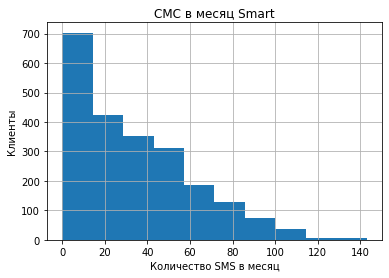

In [96]:
df[df['tariff'] == 'smart']['sms_total_in_month'].plot(kind='hist', bins=10, grid=True)
plt.title('СМС в месяц Smart')
plt.xlabel('Количество SMS в месяц')
plt.ylabel('Клиенты')
plt.show();

Отсюда мы видим, что большая часть пользователей или не пользуется услугой смс или перестает пользоваться.

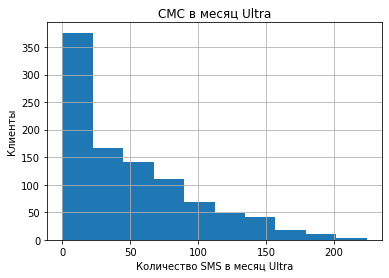

In [97]:
df[df['tariff'] == 'ultra']['sms_total_in_month'].plot(kind='hist', bins=10, grid=True)
plt.title('СМС в месяц Ultra')
plt.xlabel('Количество SMS в месяц Ultra')
plt.ylabel('Клиенты')
plt.show();

На Ultra распределение не столь равномерное, как у Smart, но тенденция та же - все больше пользователей не пользуются смс.

**Вывод:**
Исходя из приведенных графиков и промежуточных выводов можно прийти к выводу, что в тарифе Smart люди чаще выходят за границы своего тарифа, а пользователи Ultra - реже, но это объясняется тем, что в тарифе Ultra больше запас Мб и минут. Но из-за этого и разброс получается больше.

Получается, что для клиентов выгоднее тариф Ultra, где им не приходится докупать дополнительные минуты и Гб по завышенной цене. Но тариф сам по себе предполагает широкие возможности для пользователей (по минутм, гигабайтам), и если пользователи берут такой дорогой тариф, он им нужен.

Что качается тарифа Smart, тут видна явная выгода оператора, когда клиенты докупают что-то сверх тарифа, а делают они это часто (если оператор действительно пойдет на это). Клиенты платят не за те Гб, которые они потратили сверх, а за весь доп.пакет. Естественно, это выгодно только оператору. 

По итогу: клиенты Ultra тратят с среднем 1900 до 2300 руб и не доплачивают за доп. пакеты, а большая часть клиентов Smart - 500-1200 и больше, и еще доплачивают за доп. пакеты. Это невыгдно с той стороны, что клиенты Ultra сами решими купить такой тариф и они готовы платить за услуги, которые им предоставляют в достаточном размере, а клиенты Smart, может, и не хотят дорогой тариф, но им приходится переплачивать, несмотря на то, что в сравнении Ultra, большая их часть платит меньше.


# Шаг 4. Проверка гипотез

Проверим, действительно ли:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Сначала избавимся от выбросов: избавимся от выбросов автоматически, потому что каждый раз строить гистограммы для каждого параметра непрактично.

In [98]:
def remove_outlier(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

### Гипотеза о равенстве средних двух генеральных совокупностей №1

**Сформулируем гипотезы:**

H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается

H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [99]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

Дисперсии выборок заметно отличаются, поэтому воспользуемся параметром equal_var=False

In [100]:
ultra = remove_outlier(ultra, 'total_paid')
ultra = ultra['total_paid']

In [101]:
smart = remove_outlier(smart, 'total_paid')
smart = smart['total_paid']

In [102]:
np.var(df[df['tariff'] == 'ultra'].mean())

73246172.06231752

In [103]:
np.var(df[df['tariff'] == 'smart'].mean())

27533245.128697038

In [104]:
alpha = 0.05

In [105]:
results = st.ttest_ind(ultra, smart)
#equal_var = False

In [106]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.4387886606315456e-190
Отвергаем нулевую гипотезу


Отвергаем гипотезу H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается.

### Гипотеза о равенстве средних двух генеральных совокупностей №2

**Сформулируем гипотезы:**

H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Посмотрим, какие города есть кроме Москвы.

Посчитаем дисперсию выборок, чтобы понять с каким параметром equal_var использовать метод проверки ttest_ind.

In [107]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [108]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Область')

In [109]:
moscow = df[df['region'] == 'Москва']
oblast = df[df['region'] == 'Область']

In [110]:
moscow = remove_outlier(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

In [111]:
oblast = remove_outlier(oblast, 'total_paid', 0)
oblast = oblast['total_paid']

In [112]:
np.var(df[df['region'] == 'Москва'].mean())

42062917.72732207

In [113]:
np.var(df[df['region'] == 'Область'].mean())

37614744.82766338

In [114]:
results = st.ttest_ind(moscow, oblast)
#equal_var=False

In [115]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.30618998384456464
Не получилось отвергнуть нулевую гипотезу


Значения выборок отличаются на 30 %, этого недостаточно, чтобы говорить о том, что выручка с московских клиентов отличается от выручки с клиентов со всей страны.

# Шаг 5. Результаты исследования

**Выводы:**

Мы с разных сторон посмотрели на данные:

- постоили графики

- провели анализ потребностей клиента

- узнали, сколько клиенты тратят и на каких тарифах они превышают установленные лимиты

- выявили, что на самом деле денежный поток московских клиентов не всего на 30% отличается от клиентов, живущих в регионах

- выявили, что выручка пользователей тарифов «Ультра» и «Смарт» различается. что и понятно, потому что это разные тарифы с разными условиями

Что касается выбора лучшего тарифа, это сильно зависит от потребностей самого клиента. 
 Проанализировав оба тарифа можно найти минусы и плюсы в обоих:
 
 - в тарифе Ultra больше разброс, но и больше запас параметров на тарифе: это и хорошо и плохо, т.к. у клиента остается много неиспользованных минут, Мб и т.д., и они ему не передаются на следующий месяц, а со стороны оператора - ему стоит обратить на это внимание и получить выгоду с того, что клиент платит фактически за то, что он не использует.
 
В этом и минус: это может привести к оттоку пользователей, снижению их лояльности. Как минимум, такое действие неклиентоориентированно. 

- в тарифе Smart наоборот: многие клиенты выходят за лимиты тарифа и переплачивают. 

**Рекомендации оператору:**

- продумать действия с неиспользованными минутами, Мб и смс на тарифе Ultra (возможно, переносить их на следующий месяц и т.д.)

- На тарифе Smart расширить границы лимитов или предусмотреть возможность самостоятельного варьирования лимитов для клиентов при покупке тарифа и при дальнейшем его использованиии. 